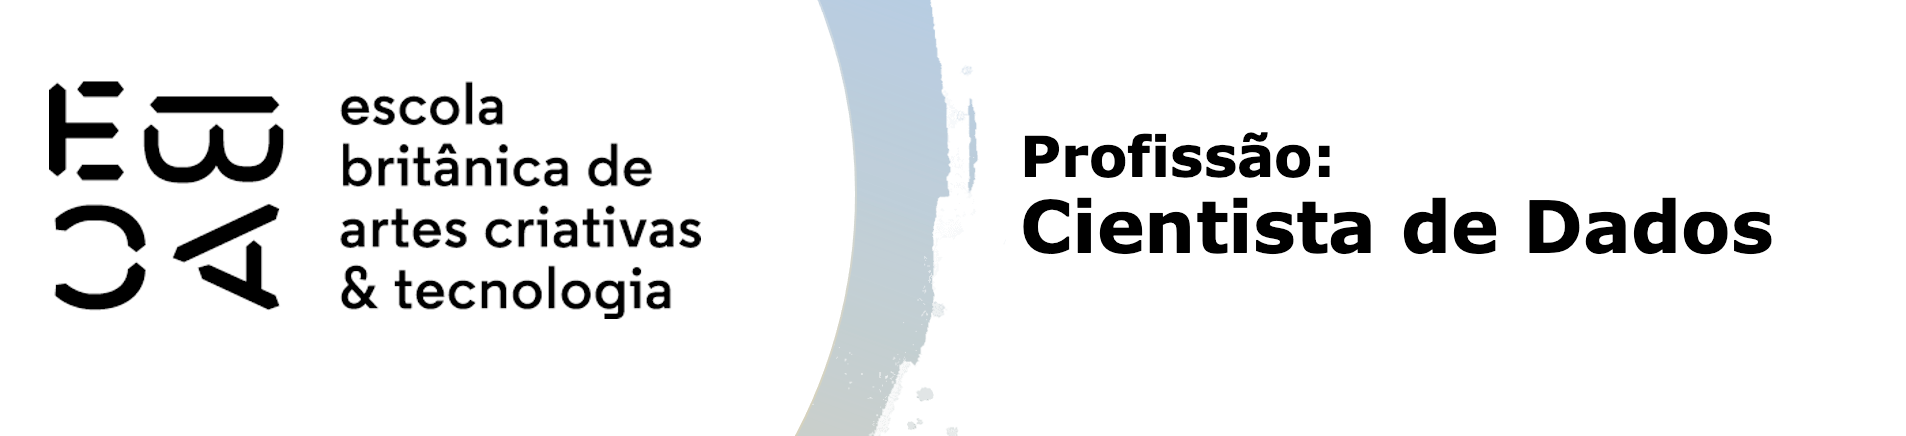

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [34]:
pip install gower

  Obtaining dependency information for gower from https://files.pythonhosted.org/packages/99/23/88b526457ea992e0a47147a886db3d749d07347c8d3a303f6076deee7299/gower-0.1.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from gower import gower_matrix

from scipy.spatial.distance  import squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [6]:
df.info()
#não há missings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df.drop(columns=['Month', 'VisitorType']).corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


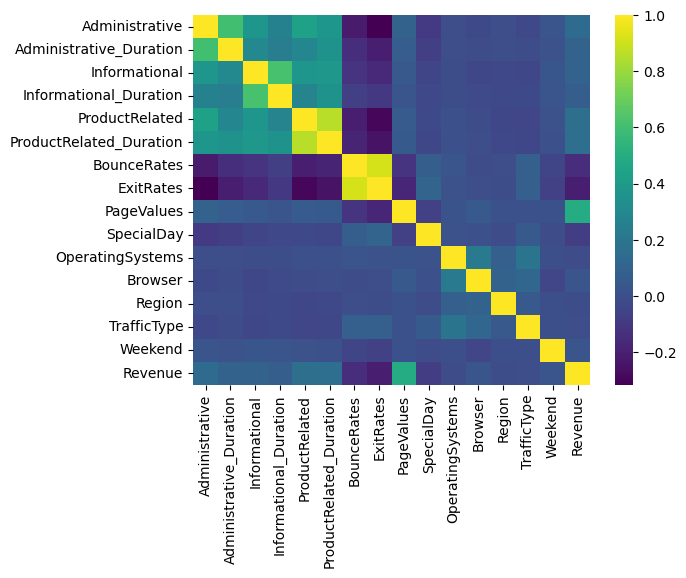

In [9]:
#heatmap para visualizar a correlação entre as colunas do DataFrame
sns.heatmap(df.drop(columns=['Month', 'VisitorType']).corr(), cmap='viridis')
plt.show()

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [12]:
#variáveis que descrevem o padrão de navegação na sessão
padrao_navegacao = ['Administrative', 
                    'Informational', 
                    'ProductRelated', 
                    'BounceRates', 
                    'ExitRates', 
                    'VisitorType']

# Obter os tipos de dados das variáveis relacionadas ao padrão de navegação na sessão, 
# criar um DataFrame e renomear as colunas
(df[padrao_navegacao]
 .dtypes
 .reset_index()
 .rename(columns={'index': 'Variável (padrao_navegacao)', 
                  0: 'Tipo'})
)

,Variável (padrao_navegacao),Tipo
0,Administrative,int64
1,Informational,int64
2,ProductRelated,int64
3,BounceRates,float64
4,ExitRates,float64
5,VisitorType,object


In [13]:
#variáveis que indicam a característica da data
indicadores_temporais = ['SpecialDay', 'Month', 'Weekend']

# Obter os tipos de dados das variáveis relacionadas à característica da data, 
# criar um DataFrame e renomear as colunas
(df[indicadores_temporais]
 .dtypes
 .reset_index()
 .rename(columns={'index': 'Variável (indicadores_temporais)', 
                  0: 'Tipo'})
)

,Variável (indicadores_temporais),Tipo
0,SpecialDay,float64
1,Month,object
2,Weekend,bool


In [14]:
# variáveis numéricas
var_num = ['Administrative', 'Informational', 'ProductRelated', 'SpecialDay']

# Selecionar as variáveis relacionadas ao padrão de navegação e à característica da data
df_ = df[padrao_navegacao + indicadores_temporais]

# Selecionar as variáveis categóricas removendo as variáveis numéricas
df_cat = df_.drop(columns=var_num)

In [16]:
#categorizar algumas variáveis que são contínuas 
df_['BounceRates_cat'] = pd.qcut(df_['BounceRates'], 
                                 q = 4, 
                                 duplicates = 'drop') 

df_['ExitRates_cat'] = pd.qcut(df_['ExitRates'], 
                               q = 4, 
                               duplicates = 'drop') 

df_

/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_39069/3138590119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['BounceRates_cat'] = pd.qcut(df_['BounceRates'],
/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_39069/3138590119.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['ExitRates_cat'] = pd.qcut(df_['ExitRates'],


,Administrative,Informational,ProductRelated,BounceRates,ExitRates,VisitorType,SpecialDay,Month,Weekend,BounceRates_cat,ExitRates_cat
0,0,0,1,0.200000,0.200000,Returning_Visitor,0.0,Feb,False,"(0.0168, 0.2]","(0.05, 0.2]"
1,0,0,2,0.000000,0.100000,Returning_Visitor,0.0,Feb,False,"(-0.001, 0.00311]","(0.05, 0.2]"
2,0,0,1,0.200000,0.200000,Returning_Visitor,0.0,Feb,False,"(0.0168, 0.2]","(0.05, 0.2]"
3,0,0,2,0.050000,0.140000,Returning_Visitor,0.0,Feb,False,"(0.0168, 0.2]","(0.05, 0.2]"
4,0,0,10,0.020000,0.050000,Returning_Visitor,0.0,Feb,True,"(0.0168, 0.2]","(0.0252, 0.05]"
...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.007143,0.029031,Returning_Visitor,0.0,Dec,True,"(0.00311, 0.0168]","(0.0252, 0.05]"
12326,0,0,5,0.000000,0.021333,Returning_Visitor,0.0,Nov,True,"(-0.001, 0.00311]","(0.0143, 0.0252]"
12327,0,0,6,0.083333,0.086667,Returning_Visitor,0.0,Nov,True,"(0.0168, 0.2]","(0.05, 0.2]"
12328,4,0,15,0.000000,0.021053,Returning_Visitor,0.0,Nov,False,"(-0.001, 0.00311]","(0.0143, 0.0252]"


In [17]:
#atualizar variáveis
padrao_navegacao = ['Administrative', 
                    'Informational', 
                    'ProductRelated', 
                    'BounceRates_cat', 
                    'ExitRates_cat', 
                    'VisitorType']

In [18]:
var = padrao_navegacao + indicadores_temporais #variáveis que serão usadas
var_cat = ['Month', 'Weekend', 'VisitorType', 'BounceRates_cat', 'ExitRates_cat',] #variáveis categóricas

df2 = pd.get_dummies(df_[var].dropna()) #criação de dummies para variáveis categóricas
df2

,Administrative,Informational,ProductRelated,SpecialDay,Weekend,"BounceRates_cat_(-0.001, 0.00311]","BounceRates_cat_(0.00311, 0.0168]","BounceRates_cat_(0.0168, 0.2]","ExitRates_cat_(-0.001, 0.0143]","ExitRates_cat_(0.0143, 0.0252]",...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0,1,0.0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,0,2,0.0,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0,0,1,0.0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,2,0.0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,10,0.0,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.0,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
12326,0,0,5,0.0,True,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
12327,0,0,6,0.0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
12328,4,0,15,0.0,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [19]:
#colunas que representam as variáveis categóricas
var_catg = df2.drop(columns=var_num).columns.values

#lista de valores booleanos indicando se cada coluna é categórica
vars_cat = [True if column in var_catg else False for column in df2.columns]
vars_cat

[False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [20]:
%%time

# Calcular a matriz de distância Gower
dist_gower = gower_matrix(df2, cat_features=vars_cat)

# Criar um DataFrame com a matriz de distância Gower
pd.DataFrame(dist_gower)

CPU times: user 1min 42s, sys: 2.14 s, total: 1min 44s
Wall time: 1min 44s


,0,1,2,3,4,5,6,7,8,9,...,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329
0,0.000000,0.080057,0.000000,0.000057,0.120511,0.161021,0.016000,0.041538,0.112057,0.176113,...,0.240397,0.080284,0.250080,0.245403,0.242518,0.287395,0.280227,0.120284,0.246720,0.280113
1,0.080057,0.000000,0.080057,0.080000,0.200454,0.160965,0.096057,0.121595,0.032000,0.096057,...,0.240340,0.160227,0.170024,0.165346,0.162461,0.287338,0.200170,0.200227,0.166664,0.200057
2,0.000000,0.080057,0.000000,0.000057,0.120511,0.161021,0.016000,0.041538,0.112057,0.176113,...,0.240397,0.080284,0.250080,0.245403,0.242518,0.287395,0.280227,0.120284,0.246720,0.280113
3,0.000057,0.080000,0.000057,0.000000,0.120454,0.160965,0.016057,0.041595,0.112000,0.176057,...,0.240340,0.080227,0.250024,0.245346,0.242461,0.287338,0.280170,0.120227,0.246664,0.280057
4,0.120511,0.200454,0.120511,0.120454,0.000000,0.200511,0.136511,0.082049,0.232454,0.216397,...,0.200113,0.200227,0.289570,0.284892,0.202007,0.166884,0.240284,0.160227,0.286210,0.320397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.287395,0.287338,0.287395,0.287338,0.166884,0.206374,0.303395,0.245970,0.319338,0.303281,...,0.126998,0.287111,0.206203,0.281992,0.208210,0.000000,0.247168,0.247111,0.283638,0.327281
12326,0.280227,0.200170,0.280227,0.280170,0.240284,0.200794,0.296227,0.241765,0.232170,0.136113,...,0.200170,0.200057,0.209853,0.125176,0.122291,0.247168,0.000000,0.160057,0.046493,0.160113
12327,0.120284,0.200227,0.120284,0.120227,0.160227,0.280738,0.136284,0.081822,0.232227,0.296170,...,0.200113,0.040000,0.289797,0.205119,0.202234,0.247111,0.160057,0.000000,0.206437,0.160170
12328,0.246720,0.166664,0.246720,0.246664,0.286210,0.166153,0.262720,0.285296,0.198664,0.102607,...,0.166323,0.166437,0.163360,0.084608,0.087649,0.283638,0.046493,0.206437,0.000000,0.206607


In [21]:
# Converter a matriz de distância Gower em um vetor
gdv = squareform(X=dist_gower, force='tovector')

# Calcular a matriz de ligação usando o método 'complete'
Z = linkage(y=gdv, method='complete')

# Criar um DataFrame com a matriz de ligação
pd.DataFrame(data=Z, columns=['id1', 'id2', 'dist', 'n'])

,id1,id2,dist,n
0,0.0,2.0,0.000000,2.0
1,1.0,14.0,0.000000,2.0
2,16.0,12330.0,0.000000,3.0
3,3.0,21.0,0.000000,2.0
4,6.0,79.0,0.000000,2.0
...,...,...,...,...
12324,24649.0,24653.0,0.421081,4647.0
12325,24639.0,24652.0,0.431626,5032.0
12326,24648.0,24654.0,0.436411,5689.0
12327,24655.0,24656.0,0.465128,10721.0



3 grupos:
dendrogram.icoord: 125
dendrogram.dcoord: 125
dendrogram.ivl: 126
dendrogram.leaves: 126
dendrogram.color_list: 125
dendrogram.leaves_color_list: 126

4 grupos:
dendrogram.icoord: 125
dendrogram.dcoord: 125
dendrogram.ivl: 126
dendrogram.leaves: 126
dendrogram.color_list: 125
dendrogram.leaves_color_list: 126


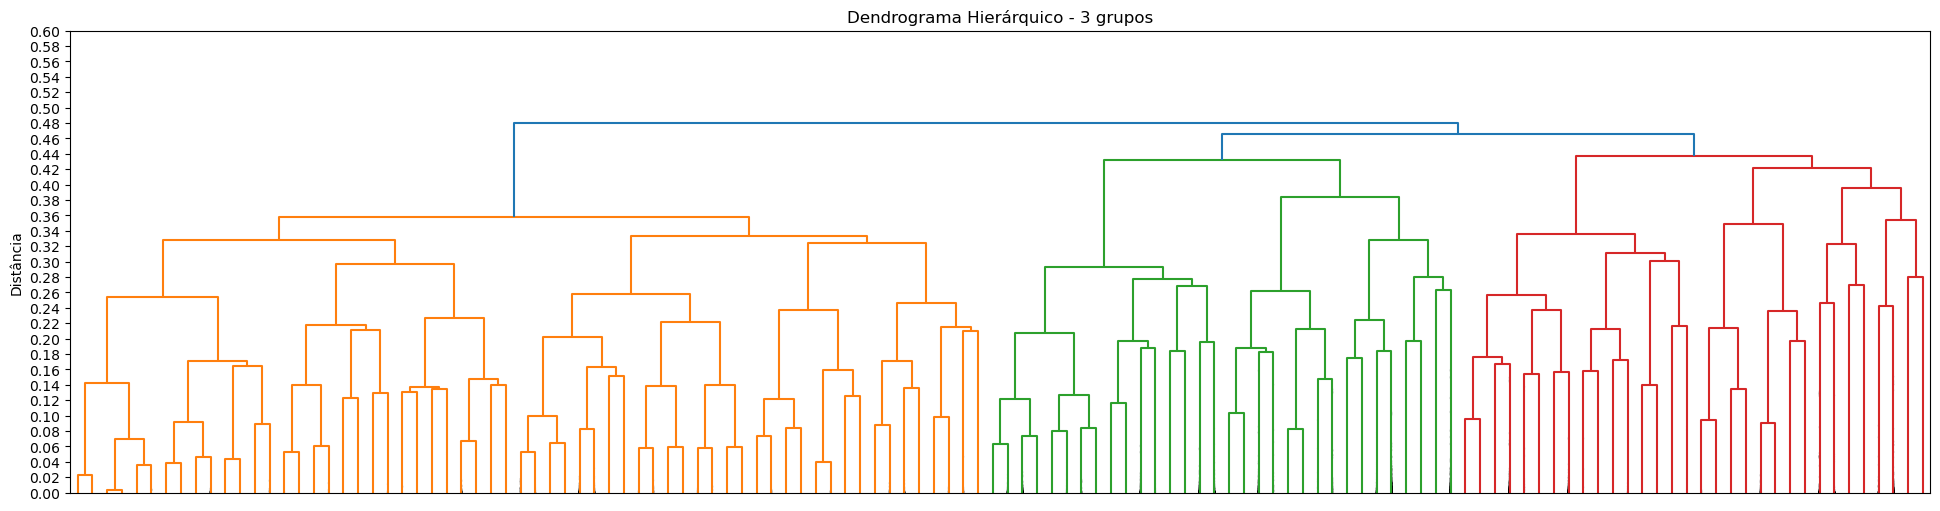

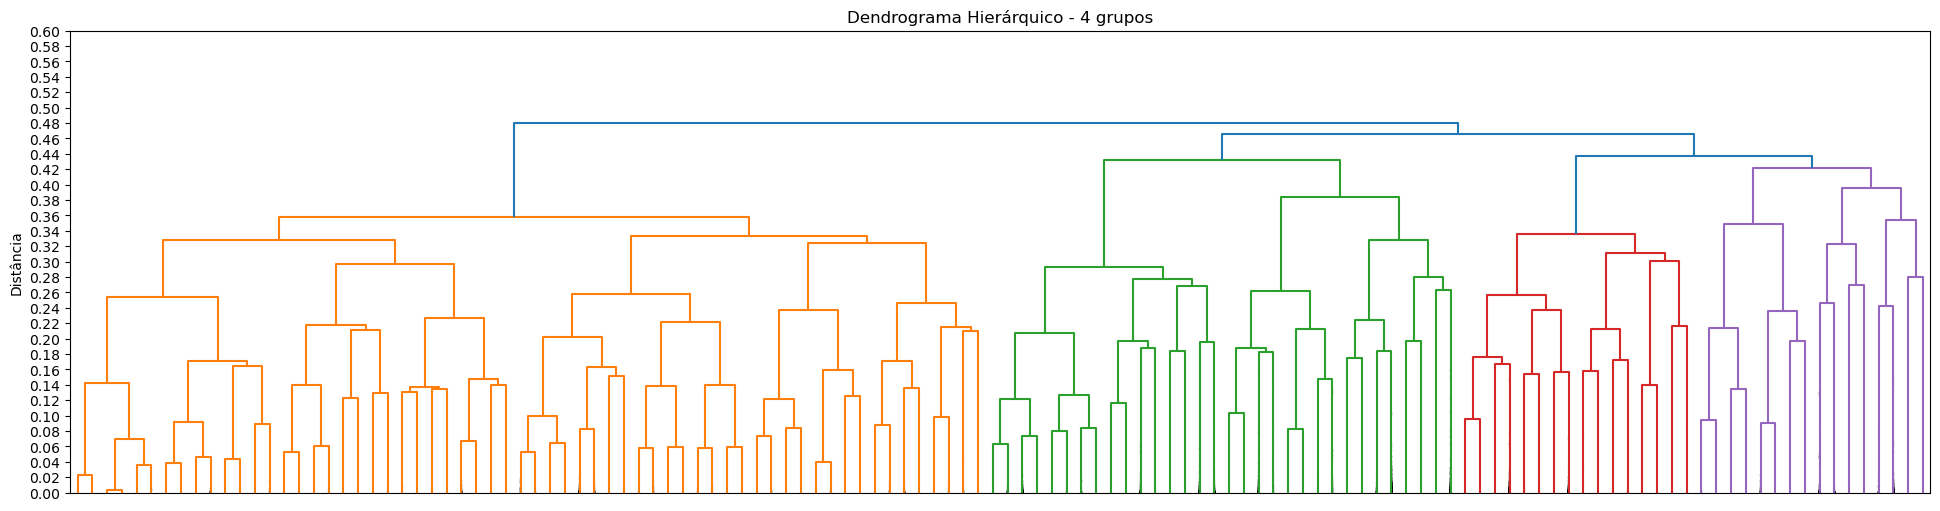

In [26]:
# Definir a função para criar um dendrograma
def dn(color_threshold: float, num_groups: int) -> None:
    """
    Cria e exibe um dendrograma.

    Parameters:
        color_threshold (float): Valor de threshold de cor para a coloração do dendrograma.
        num_groups (int): Número de grupos para o título do dendrograma.

    Returns:
        None
    """
    plt.figure(figsize=(24, 6))
    plt.ylabel(ylabel='Distância')
    
    # Adicionar o número de grupos como título
    plt.title(f'Dendrograma Hierárquico - {num_groups} grupos')

    # Criar o dendrograma com base na matriz de ligação Z
    dn = dendrogram(Z=Z, 
                    p=6, 
                    truncate_mode='level', 
                    color_threshold=color_threshold, 
                    show_leaf_counts=True, 
                    leaf_font_size=8, 
                    leaf_rotation=45, 
                    show_contracted=True)
    plt.yticks(np.linspace(0, .6, num=31))
    plt.xticks([])

    # Imprimir o número de elementos em cada parte do dendrograma
    for i in dn.keys():
        print(f'dendrogram.{i}: {len(dn[i])}')

# Para cada quantidade desejada de grupos e valor de threshold de cor, criar e exibir o dendrograma com título
for qtd, color_threshold in [(3, .46), (4, .435)]:
    print(f'\n{qtd} grupos:')
    dn(color_threshold, qtd)

# Exibir os dendrogramas criados
plt.show()

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [27]:
#Adicionar coluna 'grupo_3' ao DataFrame com base no agrupamento hierárquico
df2['grupo_3'] = fcluster(Z, 3, criterion='maxclust')
df2.grupo_3.value_counts()

grupo_3
3    5689
2    5032
1    1609
Name: count, dtype: int64

In [28]:
#Adicionar coluna 'grupo_4' ao DataFrame com base no agrupamento hierárquico
df2['grupo_4'] = fcluster(Z, 4, criterion='maxclust')
df2.grupo_4.value_counts()

grupo_4
2    5032
4    4647
1    1609
3    1042
Name: count, dtype: int64

In [29]:
#juntar df inicial com df que apresenta classificações
df3 = df.reset_index().merge(df2.reset_index(), how='left')
df3.head()

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,grupo_3,grupo_4
0,0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,...,True,False,False,False,False,False,False,False,3,4
1,1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,...,True,False,False,False,False,False,False,False,3,4
2,2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,...,True,False,False,False,False,False,False,False,3,4
3,3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,...,True,False,False,False,False,False,False,False,3,4
4,4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,...,True,False,False,False,False,False,False,False,3,4


In [39]:
df3.groupby(['VisitorType', 'grupo_3'])['index'].count().unstack()

grupo_3,1,2,3
VisitorType,,,
New_Visitor,1609.0,43.0,42.0
Other,NaN,2.0,83.0
Returning_Visitor,NaN,4987.0,5564.0


In [42]:
df3.groupby(['VisitorType', 'Revenue', 'grupo_3'])['index'].count().unstack()

grupo_3                         1       2       3
VisitorType       Revenue                        
New_Visitor       False    1203.0    32.0    37.0
                  True      406.0    11.0     5.0
Other             False       NaN     1.0    68.0
                  True        NaN     1.0    15.0
Returning_Visitor False       NaN  4283.0  4798.0
                  True        NaN   704.0   766.0

- Tipo de visitante parece ser importante para a divisão dos 3 grupos, já que o grupo 1 apresenta apenas novos visitantes, porém o 2 e 3 se misturam entre visitantes recorrentes.
- Também parece que novos visitantes estão menos propensos à compras. Grupos 2 e 3 (visitantes recorrentes) também se misturam.

In [40]:
df3.groupby(['SpecialDay', 'grupo_3'])['index'].count().unstack()

grupo_3,1,2,3
SpecialDay,,,
0.0,1552,3969,5558
0.2,9,148,21
0.4,10,202,31
0.6,21,302,28
0.8,9,280,36
1.0,8,131,15


- A proximidade com datas festivas parece influenciar o grupo 2, mas outros testes devem ser feitos para saber se essa influência é relevante.

/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

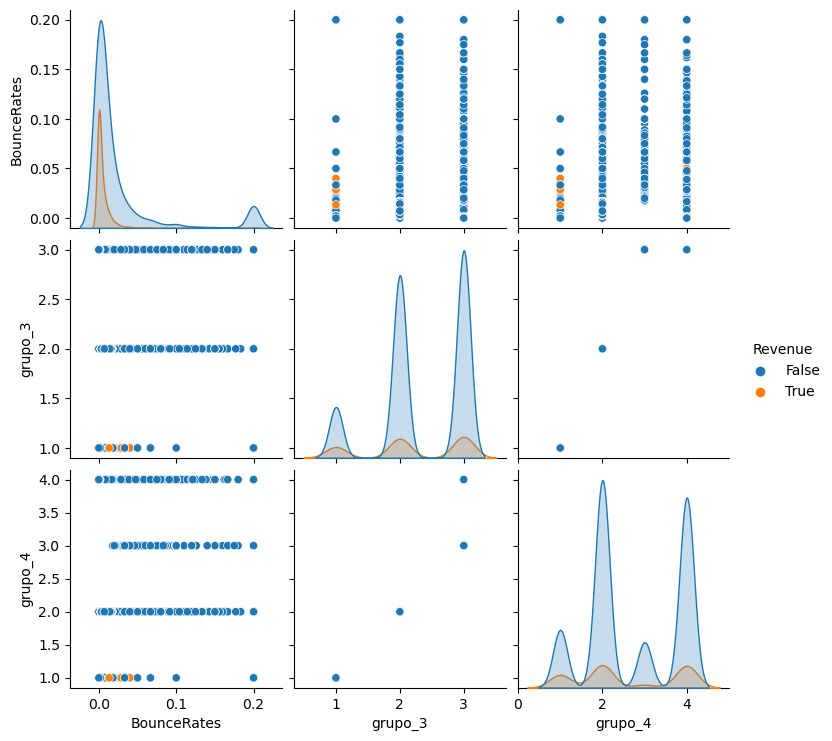

In [45]:
#análise da relação entre mais variáveis e a propensão à compra - Revenue
sns.pairplot(data=df3[['BounceRates', 'Revenue',  'grupo_3', 'grupo_4']], hue='Revenue')

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

> Na divisão em 3 grupos, relacionado à propensão a compras, o grupo 1 (de visitantes novos) parece menos propenso. Os grupos 2 e 3 se misturam em relação ao tipo de visitante (nos dois a maioria são visitantes recorrentes) e estão mais propensos à compras quando comparados ao grupo 1. 